In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df1 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/item.csv')
df1.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [114]:
df1.shape

(251, 4)

In [115]:
df1.isnull().sum()

Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64

In [116]:
df1['Category Name'].value_counts()

Category Name
Flower/Leaf Vegetables         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64

In [117]:
def rename_category(data):
    if data == 'Flower/Leaf Vegetables':
        return 'Flower'
    return data

df1['Category Name'] = df1['Category Name'].apply(rename_category)
df1['Category Name'].value_counts()

Category Name
Flower                         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64

In [118]:
df2 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/loss rate.csv')
df2.head()

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


{'whiskers': [<matplotlib.lines.Line2D at 0x296f28e50>,
 'caps': [<matplotlib.lines.Line2D at 0x296f261c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x296f28220>],
 'medians': [<matplotlib.lines.Line2D at 0x296f26ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x296f26100>],
 'means': []}

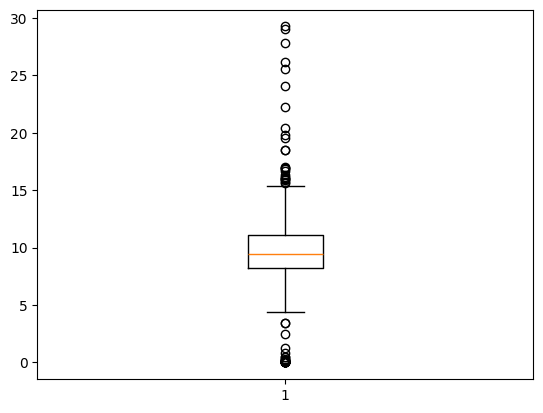

In [119]:
plt.boxplot(df2['Loss Rate (%)'])

In [120]:
(df2['Loss Rate (%)'] < 0).sum()

0

In [121]:
df3 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/sale.csv')
df3.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [122]:
df3.shape

(878503, 7)

In [123]:
df3['Time'].nunique()

849632

In [124]:
df3['Date'].nunique() / 365

2.9726027397260273

In [125]:
df3 = df3.drop(['Date', 'Time'], axis=1)
df3.isnull().sum()

Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x29ce7d8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x29ce7ddf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ce7d610>],
 'medians': [<matplotlib.lines.Line2D at 0x29ce8d2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ce8d580>],
 'means': []}

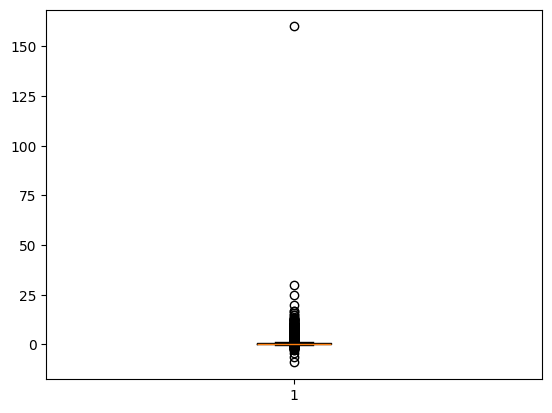

In [126]:
plt.boxplot(df3['Quantity Sold (kilo)'])

In [127]:
(df3['Quantity Sold (kilo)'] > 75).sum()

1

In [128]:
df3 = df3[~(df3['Quantity Sold (kilo)'] > 75)]

In [129]:
((df3['Quantity Sold (kilo)'] < 0).sum()) == ((df3['Sale or Return'] == 'return').sum())

True

{'whiskers': [<matplotlib.lines.Line2D at 0x29cef1370>,
 'caps': [<matplotlib.lines.Line2D at 0x29cef18b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29cef10d0>],
 'medians': [<matplotlib.lines.Line2D at 0x29cef1df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29cefe0d0>],
 'means': []}

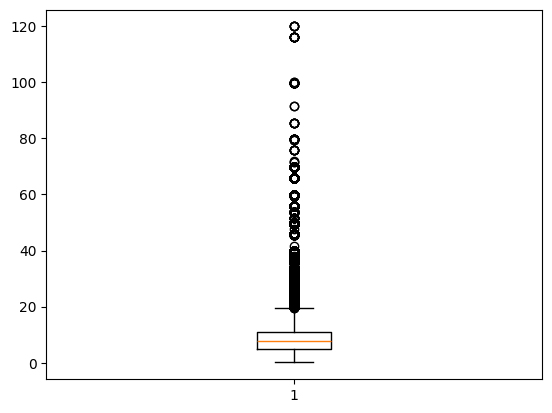

In [130]:
plt.boxplot(df3['Unit Selling Price (RMB/kg)'])

In [131]:
df4 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/wholesale price.csv')
df4.head()

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [132]:
df4.shape

(55982, 3)

{'whiskers': [<matplotlib.lines.Line2D at 0x29cf73520>,
 'caps': [<matplotlib.lines.Line2D at 0x29cf73a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x29cf73280>],
 'medians': [<matplotlib.lines.Line2D at 0x29cf73fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29cf81280>],
 'means': []}

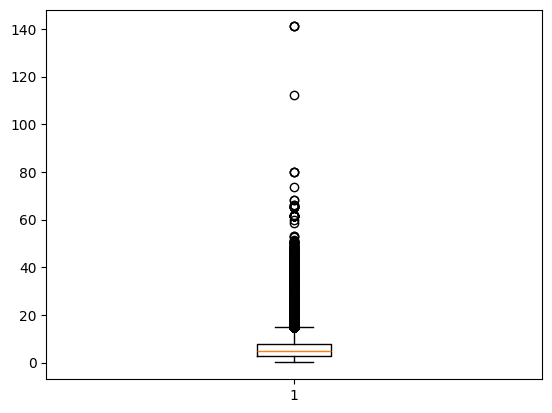

In [133]:
plt.boxplot(df4['Wholesale Price (RMB/kg)'])